In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('superstore.csv', encoding="ISO-8859-1", dtype={'Customer ID': str,'Order ID': str})

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [7]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [8]:
unique_values(data)

,Total,Uniques
Row ID,9994,9994
Order ID,9994,5009
Order Date,9994,1237
Ship Date,9994,1334
Ship Mode,9994,4
Customer ID,9994,793
Customer Name,9994,793
Segment,9994,3
Country,9994,1
City,9994,531


In [9]:
missing_data(data)

,Total,Percent
Profit,0,0.0
City,0,0.0
Order ID,0,0.0
Order Date,0,0.0
Ship Date,0,0.0
Ship Mode,0,0.0
Customer ID,0,0.0
Customer Name,0,0.0
Segment,0,0.0
Country,0,0.0


## Data Cleaning
Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data (Wikipedia).

### 1. Handling Missing Values

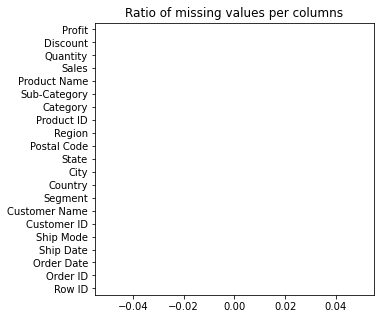

In [10]:
#checking Missing Values

plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
plt.show()


In [11]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### 2. Convert Order Date type into datetime

In [12]:
print("Order Date Feature Type before converted: ", data['Order Date'].dtype)
print("*"*100)

#Change the "Order Date" Format into date time
data['Order Date'] = pd.to_datetime(data['Order Date'])
print("Order Date Feature Type after converted : ", data['Order Date'].dtype)
data.head()

Order Date Feature Type before converted:  object
****************************************************************************************************
Order Date Feature Type after converted :  datetime64[ns]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### 3. Adding Neccesary Features
In this project, i am going to do RFM analysis to segment the customers of Online Retail in UK. In order to do RFM analysis we obviously need a feature which shows the value of Recency, Frequency, and Monetary. Hence i am going to create new dataframes which calculates the value of RFM itself later on in this project. In addition to this project, I am going to do some Exploratory Data Analysis (EDA) as well. Therefore, I am going to need several features like Months, Days, and hours. In conclusion, to complete this project i am going to add these features on my datasets :

Date
Years
Months
Days
Hours
DayOfMonth
In spite of that, it is possible that i'm going to add another features in the process of EDA.

In [13]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
# Adding Years, Months, Days, Hours, and Date
data['Years'] = data['Order Date'].dt.year
data['Months'] = data['Order Date'].dt.month
data['Days'] = data['Order Date'].dt.dayofweek+1
data['Date'] = data['Order Date'].dt.date
data['DayOfMonth'] = data['Order Date'].dt.day

#rearrange dataset
data = data[['Row ID', 'Order ID', 'Order Date', 'Years', 'Months', 'Days', 'Date', 'DayOfMonth', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']]

data.head()

,Row ID,Order ID,Order Date,Years,Months,Days,Date,DayOfMonth,Ship Date,Ship Mode,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,11,2,2016-11-08,8,11/11/2016,Second Class,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,11,2,2016-11-08,8,11/11/2016,Second Class,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,6,7,2016-06-12,12,6/16/2016,Second Class,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,10,7,2015-10-11,11,10/18/2015,Standard Class,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,10,7,2015-10-11,11,10/18/2015,Standard Class,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### 4. Droping Variable

i will drop row id, ship date and ship mode


In [15]:
data.drop(['Row ID', 'Ship Date', 'Ship Mode'], axis =1, inplace =True)

# Exploratory Data Analysis
In this EDA, i am going to cover several question below:

1. Which Months generate the highest Order and Sales?
2. Which Day of a week generate the highest Order and Sales?
3. Which Date contributes the highest Sales?
5. How does each country contributes to the sales? 
6. How does the Discount influence the business performance?

In [16]:
print("This dataset contain information from {} to {}".format(data['Date'].unique()[-1], data['Date'].unique()[0]))

This dataset contain information from 2014-01-21 to 2016-11-08


In [17]:
ord_sales_year = pd.DataFrame({'Order': data.groupby('Order ID')['Years'].unique().value_counts().sort_index(), 
                              'Sales' : data.groupby('Years')['Sales'].sum()})
ord_sales_year

,Order,Sales
[2014],969,484247.4981
[2015],1038,470532.5090
[2016],1315,609205.5980
[2017],1687,733215.2552


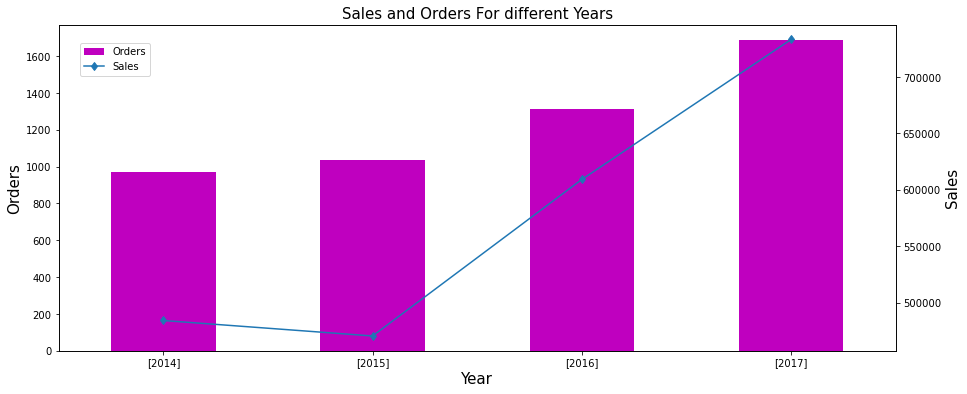

In [18]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_sales_year['Order'].plot(kind='bar', color='m', label='Orders')
ax2 = ord_sales_year['Sales'].plot(kind='line', marker='d', secondary_y=True, label = 'Sales')
ax1.set_xlabel('Year',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Sales',fontsize=15)
ax1.set_title('Sales and Orders For different Years',fontsize=15)

fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

In [19]:
ord_sales_month = pd.DataFrame({'Order': data.groupby('Order ID')['Months'].unique().value_counts().sort_index(), 
                              'Sales' : data.groupby('Months')['Sales'].sum()})
ord_sales_month

,Order,Sales
[1],178,94924.8356
[2],162,59751.2514
[3],354,205005.4888
[4],343,137762.1286
[5],369,155028.8117
[6],364,152718.6793
[7],338,147238.0970
[8],341,159044.0630
[9],688,307649.9457
[10],417,200322.9847


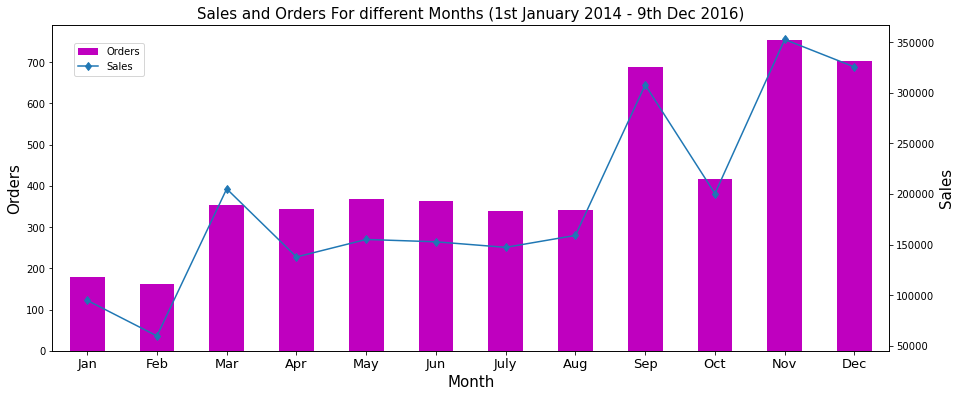

In [20]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_sales_month['Order'].plot(kind='bar', color='m', label='Orders')
ax2 = ord_sales_month['Sales'].plot(kind='line', marker='d', secondary_y=True, label = 'Sales')
ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Sales',fontsize=15)
ax1.set_title('Sales and Orders For different Months (1st January 2014 - 9th Dec 2016)',fontsize=15)
ax1.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'July','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

In [21]:
ord_sales_day = pd.DataFrame({'Order': data.groupby('Order ID')['Days'].unique().value_counts().sort_index(), 
                              'Sales' : data.groupby('Days')['Sales'].sum()})
ord_sales_day

,Order,Sales
[1],920,428937.8157
[2],558,287209.5022
[3],182,88056.9752
[4],746,321965.7785
[5],916,427692.2593
[6],837,357984.6830
[7],850,385353.8464


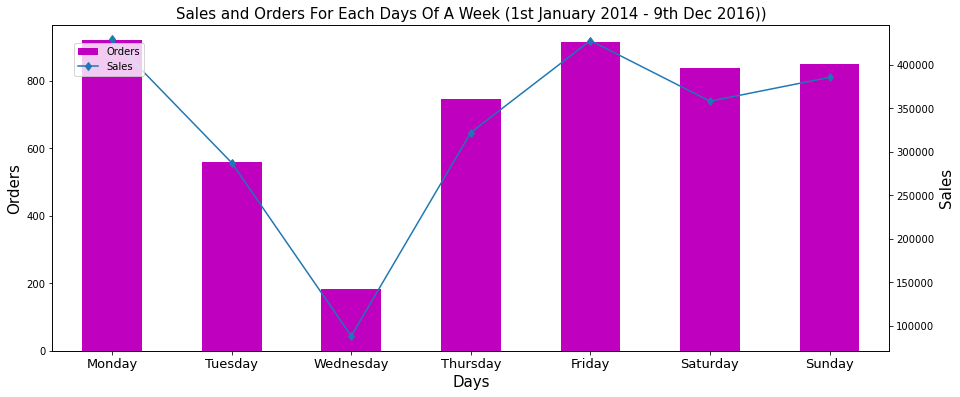

In [22]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_sales_day['Order'].plot(kind='bar', color='m', label='Orders')
ax2 = ord_sales_day['Sales'].plot(kind='line', marker='d', secondary_y=True, label = 'Sales')
ax1.set_xlabel('Days',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Sales',fontsize=15)
ax1.set_title('Sales and Orders For Each Days Of A Week (1st January 2014 - 9th Dec 2016))',fontsize=15)
ax1.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'), 
                    rotation='horizontal', fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

## 3. Which Date contributes the highest sales?

In [23]:
ord_sales_date = pd.DataFrame({'Order': data.groupby('Order ID')['DayOfMonth'].unique().value_counts().sort_index(), 
                             'Sales' : data.groupby('DayOfMonth')['Sales'].sum()})
ord_sales_date


,Order,Sales
[1],165,95524.5664
[2],179,105139.1240
[3],191,72319.9246
[4],159,68162.3390
[5],179,64520.5088
[6],147,53306.8580
[7],159,62610.9065
[8],172,101577.9506
[9],167,66582.3650
[10],163,62993.8410


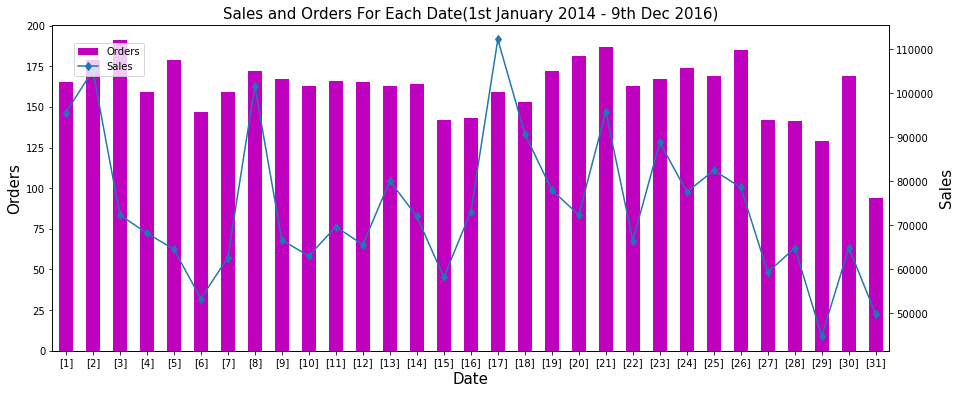

In [24]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_sales_date['Order'].plot(kind='bar', color='m', label='Orders')
ax2 = ord_sales_date['Sales'].plot(kind='line', marker='d', secondary_y=True, label = 'Sales')
ax1.set_xlabel('Date',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Sales',fontsize=15)
ax1.set_title('Sales and Orders For Each Date(1st January 2014 - 9th Dec 2016)',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

## 4. How does each country contributes to the sales? 

In [25]:
print("Number of State that the sales cover : ", data['State'].nunique())
print("List of state : ")
n = 1
for i in data['State'].unique():
    print("{}. {}".format(n, i))
    n += 1

Number of State that the sales cover :  49
List of state : 
1. Kentucky
2. California
3. Florida
4. North Carolina
5. Washington
6. Texas
7. Wisconsin
8. Utah
9. Nebraska
10. Pennsylvania
11. Illinois
12. Minnesota
13. Michigan
14. Delaware
15. Indiana
16. New York
17. Arizona
18. Virginia
19. Tennessee
20. Alabama
21. South Carolina
22. Oregon
23. Colorado
24. Iowa
25. Ohio
26. Missouri
27. Oklahoma
28. New Mexico
29. Louisiana
30. Connecticut
31. New Jersey
32. Massachusetts
33. Georgia
34. Nevada
35. Rhode Island
36. Mississippi
37. Arkansas
38. Montana
39. New Hampshire
40. Maryland
41. District of Columbia
42. Kansas
43. Vermont
44. Maine
45. South Dakota
46. Idaho
47. North Dakota
48. Wyoming
49. West Virginia


In [26]:
state_perform = pd.DataFrame({'Order': data.groupby('Order ID')['State'].unique().value_counts().sort_index(), 
                               'Sales': data.groupby('State')['Sales'].sum()})
state_perform.sort_values(by='Sales', ascending=False)

,Order,Sales
State,,
[California],1021,457687.6315
[New York],562,310876.2710
[Texas],487,170188.0458
[Washington],256,138641.2700
[Pennsylvania],288,116511.9140
[Florida],200,89473.7080
[Illinois],276,80166.1010
[Ohio],236,78258.1360
[Michigan],117,76269.6140


In [27]:
#Import plotly.express libraries for visualization
import plotly.express as px

# total bookings per market segment (incl. canceled)
segments=state_perform["Sales"]

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=state_perform.index,
             title="State Performance by Profitability",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [28]:
state_perform['Percentage'] = (state_perform['Sales']/state_perform['Sales'].sum())*100
state_perform.sort_values(by='Percentage', ascending=False).head(10)

,Order,Sales,Percentage
State,,,
[California],1021,457687.6315,19.923710
[New York],562,310876.2710,13.532829
[Texas],487,170188.0458,7.408497
[Washington],256,138641.2700,6.035226
[Pennsylvania],288,116511.9140,5.071908
[Florida],200,89473.7080,3.894901
[Illinois],276,80166.1010,3.489730
[Ohio],236,78258.1360,3.406674
[Michigan],117,76269.6140,3.320111


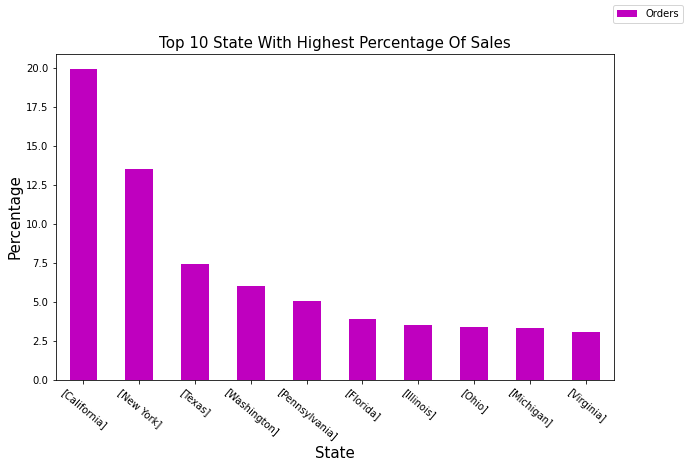

In [29]:
top_ten = state_perform.sort_values(by='Percentage', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))
top_ten['Percentage'].plot(kind='bar', color='m', label='Orders')
ax1.set_ylabel('Percentage',fontsize=15)
ax1.set_xlabel('State',fontsize=15)
plt.xticks(rotation=(365-45))
ax1.set_title('Top 10 State With Highest Percentage Of Sales',fontsize=15)
fig.legend(loc="upper right", bbox_transform=ax1.transAxes)
plt.show()


In [30]:
data

,Order ID,Order Date,Years,Months,Days,Date,DayOfMonth,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016,11,2,2016-11-08,8,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016,11,2,2016-11-08,8,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016,6,7,2016-06-12,12,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015,10,7,2015-10-11,11,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015,10,7,2015-10-11,11,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014,1,2,2014-01-21,21,TB-21400,Tom Boeckenhauer,Consumer,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2017-02-26,2017,2,7,2017-02-26,26,DB-13060,Dave Brooks,Consumer,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2017-02-26,2017,2,7,2017-02-26,26,DB-13060,Dave Brooks,Consumer,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2017-02-26,2017,2,7,2017-02-26,26,DB-13060,Dave Brooks,Consumer,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [31]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 
          'july', 'august', 'september', 'october', 'november', 'desember']

mon_sales = []
disc_count = []

for i in range(1,13):
    mon_sales.append(data[data['Months'] == i]['Sales'].sum())
    disc_count.append(data[(data['Discount'] > 0) &(data['Months'] == i)]['Discount'].count())
    
disc_rev = pd.DataFrame({'monthly_sales': mon_sales, 'num_of_disc': disc_count}, index=months)
disc_rev

,monthly_sales,num_of_disc
january,94924.8356,179
february,59751.2514,137
march,205005.4888,361
april,137762.1286,364
may,155028.8117,389
june,152718.6793,385
july,147238.0970,374
august,159044.0630,380
september,307649.9457,685
october,200322.9847,449


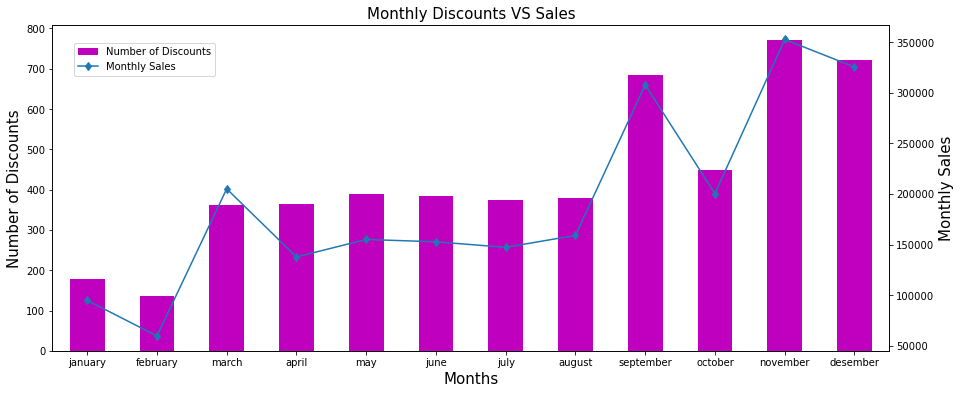

In [32]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_rev['num_of_disc'].plot(kind='bar', color='m', label='Number of Discounts')
ax2 = disc_rev['monthly_sales'].plot(kind='line', marker='d', secondary_y=True, label = 'Monthly Sales')
ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('Monthly Sales',fontsize=15)
ax1.set_title('Monthly Discounts VS Sales',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

In [33]:
disc_rev.corr(method='spearman')

,monthly_sales,num_of_disc
monthly_sales,1.000000,0.832168
num_of_disc,0.832168,1.000000


<Figure size 432x432 with 0 Axes>

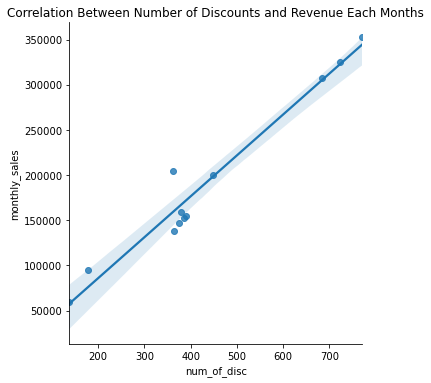

In [34]:
plt.figure(figsize=(6,6))
sns.lmplot(data = disc_rev, x = 'num_of_disc', y = 'monthly_sales')
plt.title('Correlation Between Number of Discounts and Revenue Each Months')
plt.show()

In [35]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 
          'july', 'august', 'september', 'october', 'november', 'desember']

mon_prof = []
disc_count = []

for i in range(1,13):
    mon_prof.append(data[data['Months'] == i]['Profit'].sum())
    disc_count.append(data[(data['Discount'] > 0) &(data['Months'] == i)]['Discount'].count())
    
disc_rev = pd.DataFrame({'monthly_revenue': mon_prof, 'num_of_disc': disc_count}, index=months)
disc_rev

,monthly_revenue,num_of_disc
january,9134.4461,179
february,10294.6107,137
march,28594.6872,361
april,11587.4363,364
may,22411.3078,389
june,21285.7954,385
july,13832.6648,374
august,21776.9384,380
september,36857.4753,685
october,31784.0413,449


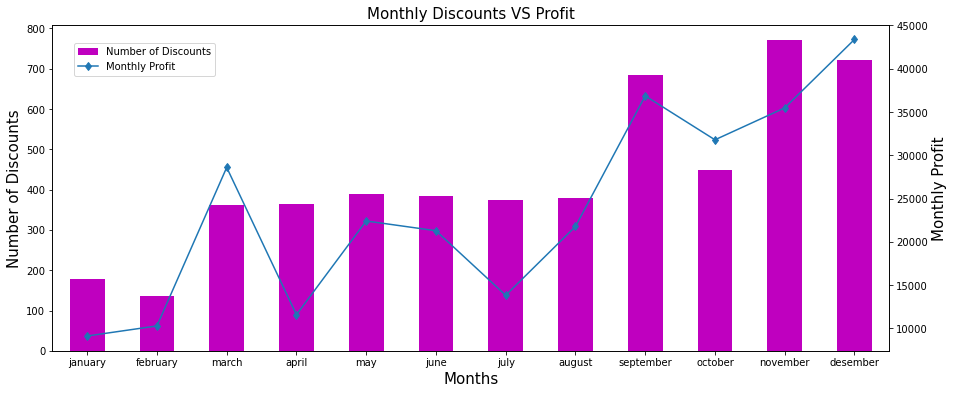

In [36]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_rev['num_of_disc'].plot(kind='bar', color='m', label='Number of Discounts')
ax2 = disc_rev['monthly_revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Monthly Profit')
ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('Monthly Profit',fontsize=15)
ax1.set_title('Monthly Discounts VS Profit',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

In [37]:
disc_rev.corr(method='spearman')

,monthly_revenue,num_of_disc
monthly_revenue,1.00000,0.86014
num_of_disc,0.86014,1.00000


<Figure size 432x432 with 0 Axes>

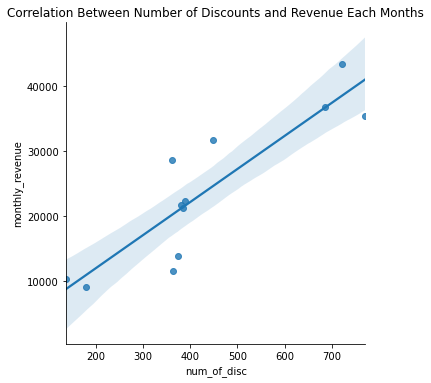

In [38]:
plt.figure(figsize=(6,6))
sns.lmplot(data = disc_rev, x = 'num_of_disc', y = 'monthly_revenue')
plt.title('Correlation Between Number of Discounts and Revenue Each Months')
plt.show()

In [39]:
disc_rev.insert(loc=2, column='num_of_order', 
                value=pd.Series(data.groupby('Order ID')['Months'].unique().value_counts().sort_index()).values)
disc_rev

,monthly_revenue,num_of_disc,num_of_order
january,9134.4461,179,178
february,10294.6107,137,162
march,28594.6872,361,354
april,11587.4363,364,343
may,22411.3078,389,369
june,21285.7954,385,364
july,13832.6648,374,338
august,21776.9384,380,341
september,36857.4753,685,688
october,31784.0413,449,417


<AxesSubplot:>

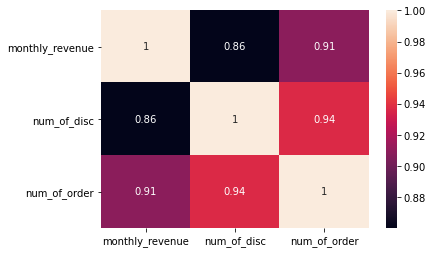

In [40]:
sns.heatmap(disc_rev.corr(method='spearman'), annot=True)

In [41]:
disc_rev.corr(method='spearman')

,monthly_revenue,num_of_disc,num_of_order
monthly_revenue,1.000000,0.860140,0.909091
num_of_disc,0.860140,1.000000,0.937063
num_of_order,0.909091,0.937063,1.000000


### Segment top sales?

In [42]:
print("Number of Segment that the sales cover : ", data['Segment'].nunique())
print("List of segment : ")
n = 1
for i in data['Segment'].unique():
    print("{}. {}".format(n, i))
    n += 1

Number of Segment that the sales cover :  3
List of segment : 
1. Consumer
2. Corporate
3. Home Office


In [43]:
segment_perform = pd.DataFrame({'Order': data.groupby('Order ID')['Segment'].unique().value_counts().sort_index(), 
                               'Sales': data.groupby('Segment')['Sales'].sum()})
segment_perform.sort_values(by='Order', ascending=False)

,Order,Sales
Segment,,
[Consumer],2586,1.161401e+06
[Corporate],1514,7.061464e+05
[Home Office],909,4.296531e+05


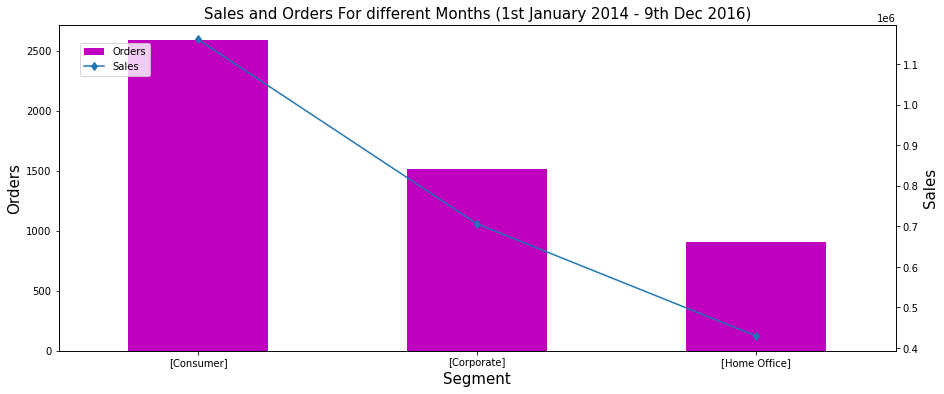

In [44]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = segment_perform['Order'].plot(kind='bar', color='m', label='Orders')
ax2 = segment_perform['Sales'].plot(kind='line', marker='d', secondary_y=True, label = 'Sales')
ax1.set_xlabel('Segment',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Sales',fontsize=15)
ax1.set_title('Sales and Orders For different Months (1st January 2014 - 9th Dec 2016)',fontsize=15)

fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

In [45]:
from wordcloud import WordCloud, STOPWORDS

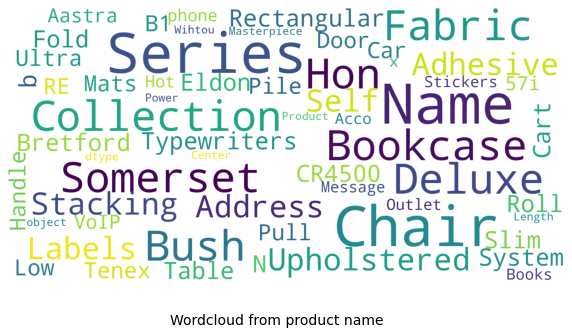

In [46]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data["Product Name"], "Wordcloud from product name")

# Customer Segmentation Using RFM Analysis (Quantiles Method and K-Means Clustering
Here are the steps in this Clustering Projects :

1. Data Preparation

- Creating Recency DataFrames
- Creating Frequency DataFrames
- Creating Monetary DataFrames
- Creating RFM DataFrames
2. RFM Analysis with Quantiles Method

- Calculate RFM Quantiles
- Creating Segments using Quantiles
- Create RFM Segmentation Table
- Calculate RFMScore and Generate Clusters
3. RFM Analysis Using K-Means Clustering

- Define K Value for clustering
- Fitting Model Predicting CLuster
- Cluster Visualization
- Cluster Evaluation
4. Cluster Exploration

- How many Customer for each group/cluster?
- How does each cluster/group contribute to the company's revenue?
- What is the common stock ordered in each group
- When does each cluster usually made an order?
- How does each cluster react on a discounts?

## Section 01 : Data Preparation
In this section, i am going to prepare an RFM datasets that is ready for analysis either using Quantiles Method or using K-Means Clustering. To give a comprehensive understanding of this project, here are some explanation of each calculation:

Recency : how long it’s been since a customer bought something from us. last date available in Dataset - last date of purchase each customer
Frequency — how often a customer buys from us. calculate frequency of purchases, count each particular (order id)
Monetary value — the total value of purchases a customer has made. (sales)

## 1. Create Recency Data Frame

In [47]:
#group by customers and check last date of purshace
recency_df = data.groupby(by='Customer ID', as_index=False)['Date'].max()
recency_df.columns = ['Customer ID','LastPurchaseDate']
recency_df.head()

,Customer ID,LastPurchaseDate
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2017-11-05
4,AB-10015,2016-11-10


In [48]:
now = data['Date'].max()
now = pd.to_datetime(now)
recency_df['LastPurchaseDate'] = pd.to_datetime(recency_df['LastPurchaseDate'])

In [49]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.head()

,Customer ID,LastPurchaseDate,Recency
0,AA-10315,2017-06-29,184
1,AA-10375,2017-12-11,19
2,AA-10480,2017-04-15,259
3,AA-10645,2017-11-05,55
4,AB-10015,2016-11-10,415


In [50]:
recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

0      184
1       19
2      259
3       55
4      415
      ... 
788     43
789      4
790      9
791     54
792    202
Name: LastPurchaseDate, Length: 793, dtype: int64

In [51]:
# Drop LastPurchaseDate because we don't need it
recency_df = recency_df.drop('LastPurchaseDate', axis=1)
recency_df.head()

,Customer ID,Recency
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,55
4,AB-10015,415


## 2. Create Frequency Data Frame

In [52]:
# drop duplicates
data_copy = data
data_copy.drop_duplicates(subset=['Order ID', 'Customer ID'], keep="first", inplace=True)

#calculate frequency of purchases
frequency_df = data_copy.groupby(by=['Customer ID'], as_index=False)['Order ID'].count()
frequency_df.columns = ['Customer ID','Frequency']
frequency_df.head()

,Customer ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


## 3. Creating Monetary DataFrames

In [53]:
monetary_df = data.groupby(by='Customer ID',as_index=False).agg({'Sales': 'sum'})
monetary_df.columns = ['Customer ID','Monetary']
monetary_df.head()

,Customer ID,Monetary
0,AA-10315,5008.480
1,AA-10375,718.000
2,AA-10480,76.502
3,AA-10645,1064.158
4,AB-10015,283.316


In [54]:
data[data['Customer ID']=='AA-10315']

,Order ID,Order Date,Years,Months,Days,Date,DayOfMonth,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1159,CA-2017-147039,2017-06-29,2017,6,4,2017-06-29,29,AA-10315,Alex Avila,Consumer,...,55407,Central,OFF-AP-10000576,Office Supplies,Appliances,"Belkin 325VA UPS Surge Protector, 6'",362.940,3,0.0,90.7350
1299,CA-2015-121391,2015-10-04,2015,10,7,2015-10-04,4,AA-10315,Alex Avila,Consumer,...,94109,West,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2,0.0,7.0096
2229,CA-2014-128055,2014-03-31,2014,3,1,2014-03-31,31,AA-10315,Alex Avila,Consumer,...,94122,West,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2,0.2,252.5880
5198,CA-2016-103982,2016-03-03,2016,3,4,2016-03-03,3,AA-10315,Alex Avila,Consumer,...,78664,Central,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,3930.072,3,0.2,-786.0144
7468,CA-2014-138100,2014-09-15,2014,9,1,2014-09-15,15,AA-10315,Alex Avila,Consumer,...,10011,East,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,3,0.0,7.0218


## 4. Creating RFM Dataframes

In [55]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='Customer ID')
temp_df.head()

,Customer ID,Recency,Frequency
0,AA-10315,184,5
1,AA-10375,19,9
2,AA-10480,259,4
3,AA-10645,55,6
4,AB-10015,415,3


In [56]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='Customer ID')
#use CustomerID as index
rfm_df.set_index('Customer ID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,5,5008.480
AA-10375,19,9,718.000
AA-10480,259,4,76.502
AA-10645,55,6,1064.158
AB-10015,415,3,283.316


## Section 02 : RFM Analysis with Quantiles Method

In [57]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,30.0,5.0,421.408
0.50,75.0,6.0,963.580
0.75,183.0,8.0,1815.650


In [58]:
quantiles.to_dict()

{'Recency': {0.25: 30.0, 0.5: 75.0, 0.75: 183.0},
 'Frequency': {0.25: 5.0, 0.5: 6.0, 0.75: 8.0},
 'Monetary': {0.25: 421.408, 0.5: 963.58, 0.75: 1815.65}}

In [59]:
#CREATING SEGMENTS USING QUANTILES
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [60]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [61]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
Customer ID,,,,,,
AA-10315,184,5,5008.480,1,1,4
AA-10375,19,9,718.000,4,4,2
AA-10480,259,4,76.502,1,1,1
AA-10645,55,6,1064.158,3,2,3
AB-10015,415,3,283.316,1,1,1


In [62]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                             + rfm_segmentation.F_Quartile.map(str) \
                             + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer ID,,,,,,,
AA-10315,184,5,5008.480,1,1,4,114
AA-10375,19,9,718.000,4,4,2,442
AA-10480,259,4,76.502,1,1,1,111
AA-10645,55,6,1064.158,3,2,3,323
AB-10015,415,3,283.316,1,1,1,111


In [63]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer ID,,,,,,,
SE-20110,9,11,10639.6540,4,4,4,444
PO-18850,4,11,6182.1082,4,4,4,444
LC-16885,16,12,6125.2840,4,4,4,444
QJ-19255,25,9,5919.1220,4,4,4,444
AH-10210,6,9,3990.9560,4,4,4,444
VW-21775,28,10,3856.0220,4,4,4,444
RB-19465,9,12,3794.1140,4,4,4,444
DK-13225,10,9,3772.4980,4,4,4,444
JG-15160,1,11,3257.6940,4,4,4,444


In [64]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  30
Loyal Customers:  159
Big Spenders:  198
Almost Lost:  14
Lost Customers:  8
Lost Cheap Customers:  74


In [65]:
rfm_segmentation['RFMScore'].describe()

count     793
unique     62
top       111
freq       74
Name: RFMScore, dtype: object

In [66]:
rfm_segmentation['RFMScore'].unique()

array(['114', '442', '111', '323', '334', '344', '311', '432', '242',
       '434', '411', '112', '332', '211', '232', '243', '433', '444',
       '113', '144', '233', '312', '234', '212', '214', '424', '441',
       '412', '131', '421', '333', '222', '223', '122', '213', '123',
       '231', '324', '322', '221', '343', '143', '443', '313', '414',
       '224', '132', '121', '314', '321', '133', '342', '423', '422',
       '413', '142', '244', '134', '331', '431', '341', '124'],
      dtype=object)

In [67]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer ID,,,,,,,
AA-10315,184,5,5008.480,1,1,4,114
AA-10375,19,9,718.000,4,4,2,442
AA-10480,259,4,76.502,1,1,1,111
AA-10645,55,6,1064.158,3,2,3,323
AB-10015,415,3,283.316,1,1,1,111
...,...,...,...,...,...,...,...
XP-21865,43,11,1030.072,3,4,3,343
YC-21895,4,5,4942.606,4,1,4,414
YS-21880,9,8,5059.904,4,3,4,434


# Section 03 : RFM Analysis Using K-Means Clustering
First step we will handling outlier then clustering the model. In this project i will try to find the K Values using Elbow Method.

In [68]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [69]:
rfm_segment_positive = rfm_segmentation[rfm_segmentation['Monetary']>0]

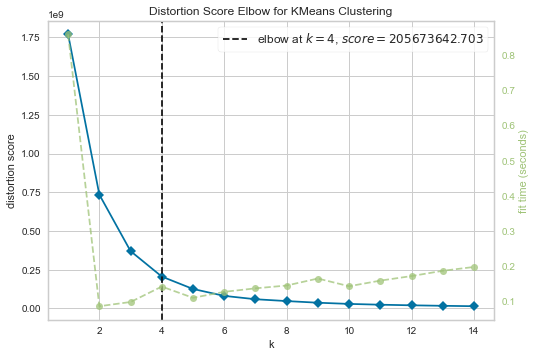

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
# Elbow Method for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,15), timings= True)
visualizer.fit(rfm_segment_positive[['Frequency', 'Monetary']])        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [71]:
from sklearn.metrics import davies_bouldin_score
results = {}
for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(rfm_segment_positive[['Frequency', 'Monetary']])
    db_index = davies_bouldin_score(rfm_segment_positive[['Frequency', 'Monetary']], labels)
    results.update({i: db_index})


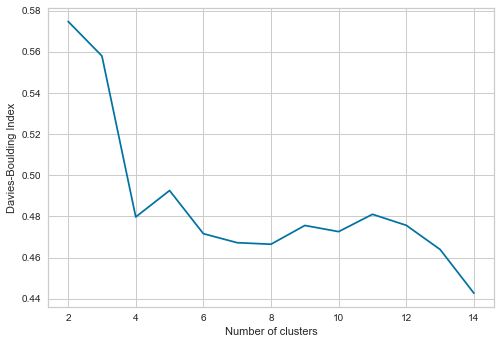

In [72]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

## 2. Fitting Model And Predicting Cluster

In [73]:
# Fitting Model
model_KM = KMeans(n_clusters = 4, max_iter = 10000) #tingkatkan iterasi untuk meningkatkan kualitas prediksi 

model_KM.fit(rfm_segment_positive[['Frequency', 'Monetary']])

KMeans(max_iter=10000, n_clusters=4)

In [74]:
model_KM.labels_

array([1, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 1, 0, 0, 1, 3, 1, 0, 3, 0, 0, 3, 0, 0,
       0, 0, 3, 0, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3,
       3, 1, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 2,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 1, 0,
       0, 0, 0, 3, 3, 3, 3, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 3, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 1, 0, 0, 3, 0,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0,
       0, 0, 1, 3, 3, 3, 1, 3, 0, 3, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0,

In [75]:
#Predict Cluster

rfm_segment_positive['cluster'] = model_KM.predict(rfm_segment_positive[['Frequency', 'Monetary']])
rfm_segment_positive.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,cluster
Customer ID,,,,,,,,
AA-10315,184,5,5008.480,1,1,4,114,1
AA-10375,19,9,718.000,4,4,2,442,0
AA-10480,259,4,76.502,1,1,1,111,0
AA-10645,55,6,1064.158,3,2,3,323,0
AB-10015,415,3,283.316,1,1,1,111,0


In [76]:
rfm_segment_positive['cluster'].describe()

count    793.000000
mean       0.912989
std        1.319529
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max        3.000000
Name: cluster, dtype: float64

## 3. Visualizing Cluster (Before Handling Outlier)

Text(0, 0.5, 'Monetary')

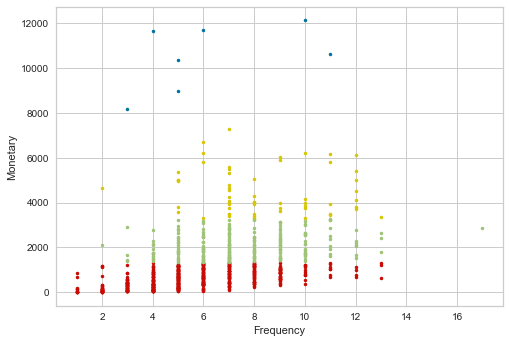

In [77]:
plt.plot(rfm_segment_positive['Frequency'][rfm_segment_positive['cluster'] == 0], 
         rfm_segment_positive['Monetary'][rfm_segment_positive['cluster'] == 0], 'r.')
plt.plot(rfm_segment_positive['Frequency'][rfm_segment_positive['cluster'] == 1], 
         rfm_segment_positive['Monetary'][rfm_segment_positive['cluster'] == 1], 'y.')
plt.plot(rfm_segment_positive['Frequency'][rfm_segment_positive['cluster'] == 2], 
         rfm_segment_positive['Monetary'][rfm_segment_positive['cluster'] == 2], 'b.')
plt.plot(rfm_segment_positive['Frequency'][rfm_segment_positive['cluster'] == 3], 
         rfm_segment_positive['Monetary'][rfm_segment_positive['cluster'] == 3], 'g.')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

## Handling Outliers in RFM Dataset

In [78]:
rfm_segmentation.describe()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,146.802018,6.316520,1386.963522,2.509458,2.235813,2.498108
std,186.211051,2.550885,1494.754510,1.121518,1.188594,1.119302
min,0.000000,1.000000,4.833000,1.000000,1.000000,1.000000
25%,30.000000,5.000000,421.408000,2.000000,1.000000,1.000000
50%,75.000000,6.000000,963.580000,3.000000,2.000000,2.000000
75%,183.000000,8.000000,1815.650000,4.000000,3.000000,3.000000
max,1165.000000,17.000000,12120.595000,4.000000,4.000000,4.000000


### Detecting Outliers with Distribution Plot

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



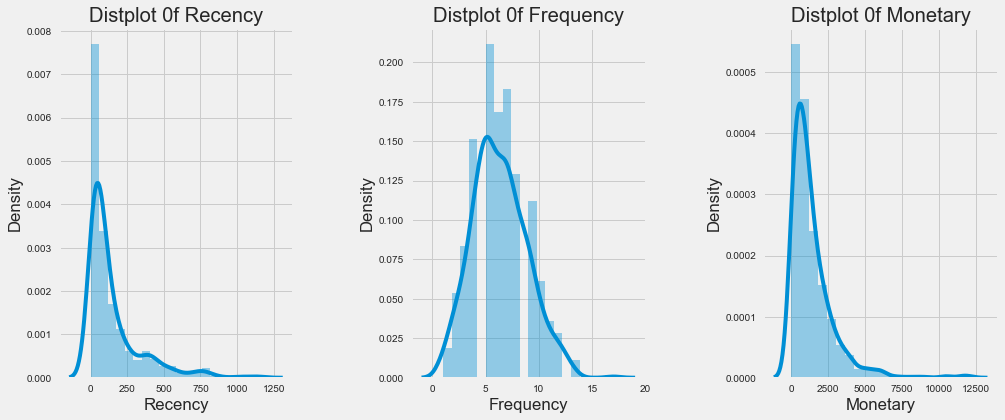

In [79]:
plt.style.use("fivethirtyeight")

plt.figure(1, figsize=(15,6))
n = 0
for x in ['Recency', 'Frequency', 'Monetary']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(rfm_segmentation[x], bins = 20)
    plt.title('Distplot 0f {}'.format(x))
plt.show()

From the Distribution Plot above, we could intuitively see that there is an outliers detected in each of the feature. To make sure that there is an outliers in out dataframe, I will try to do another outliers detection using BoxPlot

### Detecting Outliers using boxplot

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



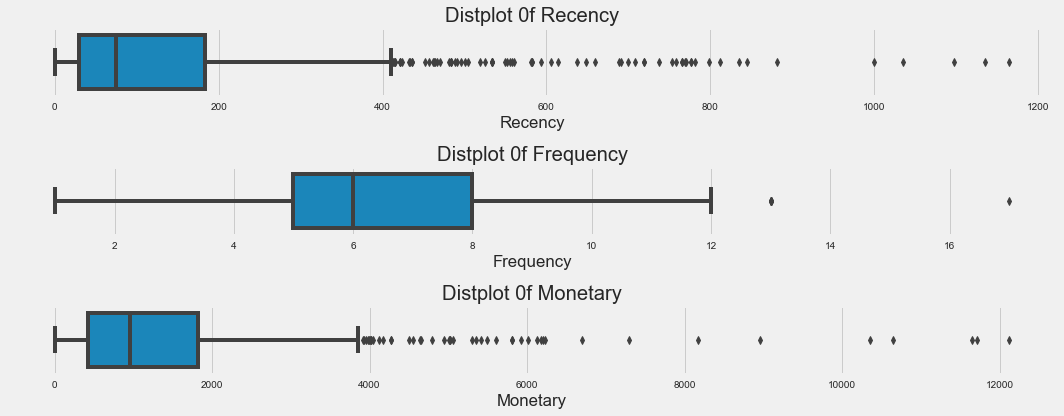

In [80]:
plt.style.use("fivethirtyeight")

plt.figure(1, figsize=(15,6))
n = 0
for x in ['Recency', 'Frequency', 'Monetary']:
    n += 1
    plt.subplot(3, 1, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.boxplot(rfm_segmentation[x])
    plt.title('Distplot 0f {}'.format(x))
plt.tight_layout()
plt.show()


C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



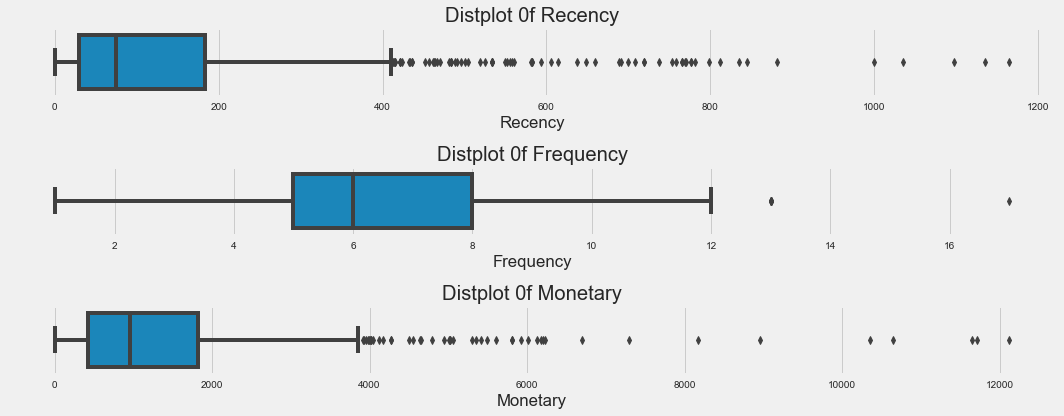

In [81]:
plt.style.use("fivethirtyeight")

plt.figure(1, figsize=(15,6))
n = 0
for x in ['Recency', 'Frequency', 'Monetary']:
    n += 1
    plt.subplot(3, 1, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.boxplot(rfm_segment_positive[x])
    plt.title('Distplot 0f {}'.format(x))
plt.tight_layout()
plt.show()

In [82]:
# Create a DataFrame without Minus(-) Transaction to avoid Infinite Number when calculate the Log value
rfm_positive = rfm_segment_positive[rfm_segment_positive['Recency']>0]

In [83]:
#Generate Feature of Logged value for each Recency, Frequency, and Monetary
cols = ['Recency', 'Frequency', 'Monetary']
for i in cols :
    rfm_positive['Log_of_{}'.format(i)] = [np.log(x) for x in rfm_positive[i]]

<ipython-input-83-99f40200f80a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
rfm_positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, AA-10315 to ZD-21925
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Recency           789 non-null    int64  
 1   Frequency         789 non-null    int64  
 2   Monetary          789 non-null    float64
 3   R_Quartile        789 non-null    int64  
 4   F_Quartile        789 non-null    int64  
 5   M_Quartile        789 non-null    int64  
 6   RFMScore          789 non-null    object 
 7   cluster           789 non-null    int32  
 8   Log_of_Recency    789 non-null    float64
 9   Log_of_Frequency  789 non-null    float64
 10  Log_of_Monetary   789 non-null    float64
dtypes: float64(4), int32(1), int64(5), object(1)
memory usage: 70.9+ KB


In [85]:
rfm_positive.isna().sum()

Recency             0
Frequency           0
Monetary            0
R_Quartile          0
F_Quartile          0
M_Quartile          0
RFMScore            0
cluster             0
Log_of_Recency      0
Log_of_Frequency    0
Log_of_Monetary     0
dtype: int64


### Distribution Plot of Recency, Frequency, and Monetary after Outliers Handling with Data Rescalling

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



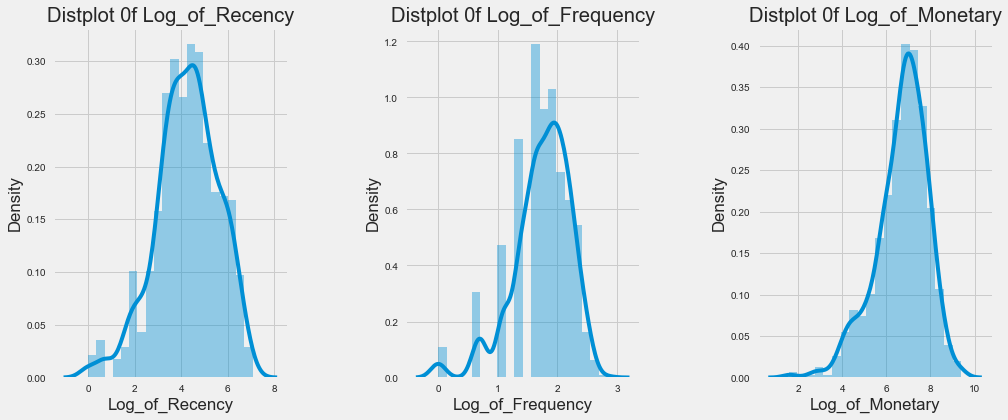

In [86]:
plt.style.use("fivethirtyeight")

plt.figure(1, figsize=(15,6))
n = 0
for x in ['Log_of_Recency', 'Log_of_Frequency', 'Log_of_Monetary']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(rfm_positive[x], bins = 20)
    plt.title('Distplot 0f {}'.format(x))
plt.show()

### BoxPlot of Recency, Frequency, and Monetary after Outliers Handling with Data Rescalling

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Performance Mngmt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



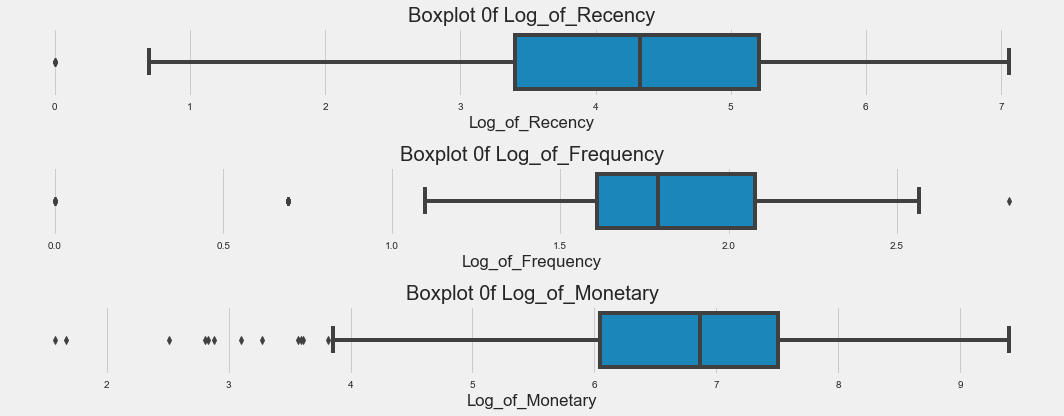

In [87]:
plt.style.use("fivethirtyeight")

plt.figure(1, figsize=(15,6))
n = 0
for x in ['Log_of_Recency', 'Log_of_Frequency', 'Log_of_Monetary']:
    n += 1
    plt.subplot(3, 1, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.boxplot(rfm_positive[x])
    plt.title('Boxplot 0f {}'.format(x))
plt.tight_layout()
plt.show()


As you can see the data distribution after rescaling is way better now. Now, let's try to build another clustering model using K-Means Clustering

STEP 1 : Define K-Value
In this section, i will find K-Value for each combination below :

1. K Value for clustering model between Recency and Frequency
2. K Value for clustering model between Recency and Monetary
3. K value for clustering model between Monetary and Frequency

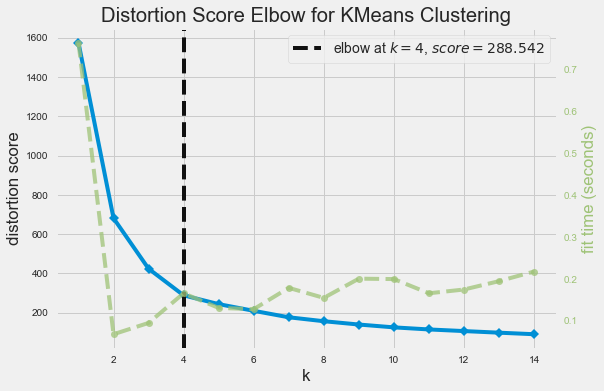

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,15), timings= True)
visualizer.fit(rfm_positive[['Log_of_Recency', 'Log_of_Frequency']])        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

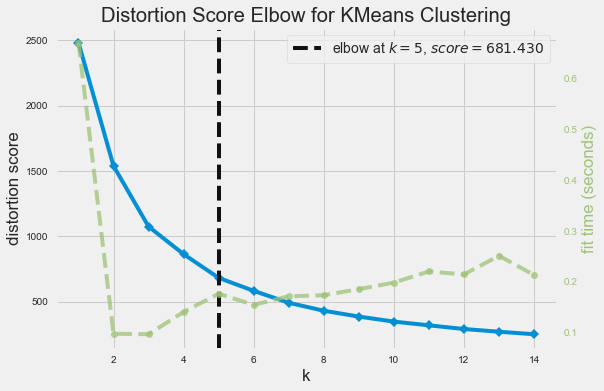

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,15), timings= True)
visualizer.fit(rfm_positive[['Log_of_Recency', 'Log_of_Monetary']])        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

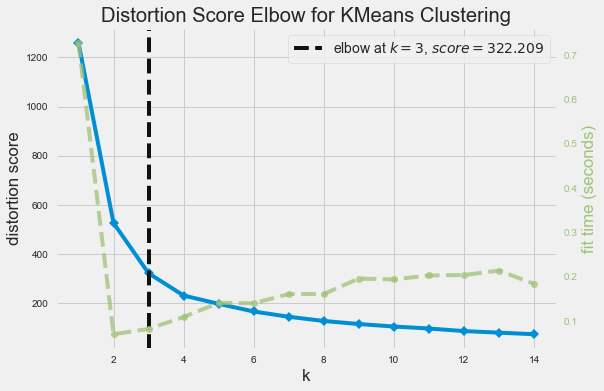

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,15), timings= True)
visualizer.fit(rfm_positive[['Log_of_Frequency', 'Log_of_Monetary']])        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

From the Elbow Method above, we could conclude that :

1. K value for model 1 = 4
2. K Value for model 2 = 5
3. K Value for model 3 = 3

#### STEP 2 : Model Fitting and Prediction


In [91]:
# Fitting Model
model_KM = KMeans(n_clusters = 4, max_iter = 10000)#raise prediction quality 
model_KM_3 = KMeans(n_clusters = 3, max_iter = 10000)
model_KM_5 = KMeans(n_clusters = 5, max_iter = 10000)
model_KM.fit(rfm_positive[['Log_of_Recency', 'Log_of_Frequency']])
model_KM_5.fit(rfm_positive[['Log_of_Recency', 'Log_of_Monetary']])
model_KM_3.fit(rfm_positive[['Log_of_Monetary', 'Log_of_Frequency']])

KMeans(max_iter=10000, n_clusters=3)

In [92]:
#Predict Cluster

rfm_positive['K-Means_RF'] = model_KM.predict(rfm_positive[['Log_of_Recency', 'Log_of_Frequency']])
rfm_positive['K-Means_RM'] = model_KM_5.predict(rfm_positive[['Log_of_Recency', 'Log_of_Monetary']])
rfm_positive['K-Means_MF'] = model_KM_3.predict(rfm_positive[['Log_of_Monetary', 'Log_of_Frequency']])
rfm_positive.head()

<ipython-input-92-4996f5ed23ba>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-4996f5ed23ba>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-4996f5ed23ba>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,cluster,Log_of_Recency,Log_of_Frequency,Log_of_Monetary,K-Means_RF,K-Means_RM,K-Means_MF
Customer ID,,,,,,,,,,,,,,
AA-10315,184,5,5008.480,1,1,4,114,1,5.214936,1.609438,8.518888,2,2,1
AA-10375,19,9,718.000,4,4,2,442,0,2.944439,2.197225,6.576470,0,1,0
AA-10480,259,4,76.502,1,1,1,111,0,5.556828,1.386294,4.337317,1,3,2
AA-10645,55,6,1064.158,3,2,3,323,0,4.007333,1.791759,6.969939,0,1,0
AB-10015,415,3,283.316,1,1,1,111,0,6.028279,1.098612,5.646563,1,3,2


In [93]:
rfm_positive[rfm_positive['K-Means_RF']==2]

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,cluster,Log_of_Recency,Log_of_Frequency,Log_of_Monetary,K-Means_RF,K-Means_RM,K-Means_MF
Customer ID,,,,,,,,,,,,,,
AA-10315,184,5,5008.480,1,1,4,114,1,5.214936,1.609438,8.518888,2,2,1
AB-10255,166,9,623.288,2,4,2,242,0,5.111988,2.197225,6.435009,2,2,0
AG-10300,118,4,349.260,2,1,1,211,0,4.770685,1.386294,5.855817,2,4,0
AG-10390,114,5,112.610,2,1,1,211,0,4.736198,1.609438,4.723931,2,3,2
AG-10495,78,8,939.700,2,3,2,232,0,4.356709,2.079442,6.845561,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TW-21025,64,7,2868.912,3,3,4,334,3,4.158883,1.945910,7.961688,2,1,1
VG-21790,154,6,717.824,2,2,2,222,0,5.036953,1.791759,6.576224,2,2,0
VM-21835,117,5,321.016,2,1,1,211,0,4.762174,1.609438,5.771491,2,4,0


#### STEP 3 : Cluster Visualization
there are 3 model of clustering in this projects, I Will to visualize each of the model

##### Clustering 1 : Monetary vs Recency

Text(0, 0.5, 'Monetary')

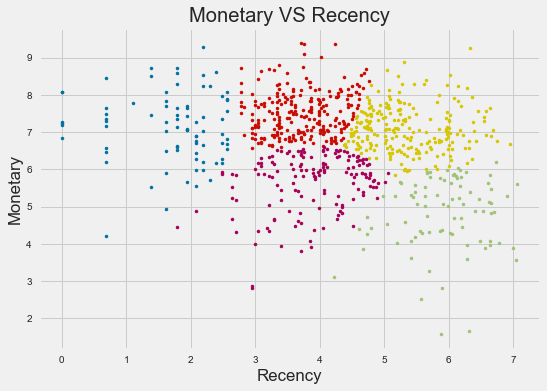

In [94]:
plt.style.use("fivethirtyeight")
plt.plot(rfm_positive['Log_of_Recency'][rfm_positive['K-Means_RM'] == 0], 
         rfm_positive['Log_of_Monetary'][rfm_positive['K-Means_RM'] == 0], 'b.')
plt.plot(rfm_positive['Log_of_Recency'][rfm_positive['K-Means_RM'] == 1], 
         rfm_positive['Log_of_Monetary'][rfm_positive['K-Means_RM'] == 1], 'r.')
plt.plot(rfm_positive['Log_of_Recency'][rfm_positive['K-Means_RM'] == 2], 
         rfm_positive['Log_of_Monetary'][rfm_positive['K-Means_RM'] == 2], 'y.')
plt.plot(rfm_positive['Log_of_Recency'][rfm_positive['K-Means_RM'] == 3], 
         rfm_positive['Log_of_Monetary'][rfm_positive['K-Means_RM'] == 3], 'g.')
plt.plot(rfm_positive['Log_of_Recency'][rfm_positive['K-Means_RM'] == 4], 
         rfm_positive['Log_of_Monetary'][rfm_positive['K-Means_RM'] == 4], 'm.')
plt.title("Monetary VS Recency")
plt.xlabel('Recency')
plt.ylabel('Monetary')

#### Clustering 2 : Frequency vs Recency

Text(0, 0.5, 'Frequency')

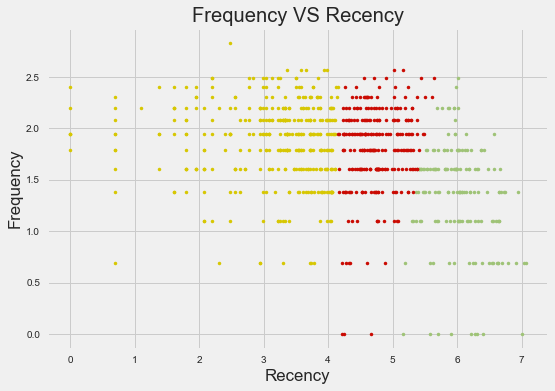

In [95]:
plt.plot(rfm_positive['Log_of_Recency'][rfm_positive['K-Means_RF'] == 0], 
         rfm_positive['Log_of_Frequency'][rfm_positive['K-Means_RF'] == 0], 'y.')
plt.plot(rfm_positive['Log_of_Recency'][rfm_positive['K-Means_RF'] == 1], 
         rfm_positive['Log_of_Frequency'][rfm_positive['K-Means_RF'] == 1], 'g.')
plt.plot(rfm_positive['Log_of_Recency'][rfm_positive['K-Means_RF'] == 2], 
         rfm_positive['Log_of_Frequency'][rfm_positive['K-Means_RF'] == 2], 'r.')
plt.plot(rfm_positive['Log_of_Recency'][rfm_positive['K-Means_RF'] == 3], 
         rfm_positive['Log_of_Frequency'][rfm_positive['K-Means_RF'] == 3], 'y.')
plt.title("Frequency VS Recency")
plt.xlabel('Recency')
plt.ylabel('Frequency')

#### Clustering 3 : Monetary vs Frequency

Text(0, 0.5, 'Frequency')

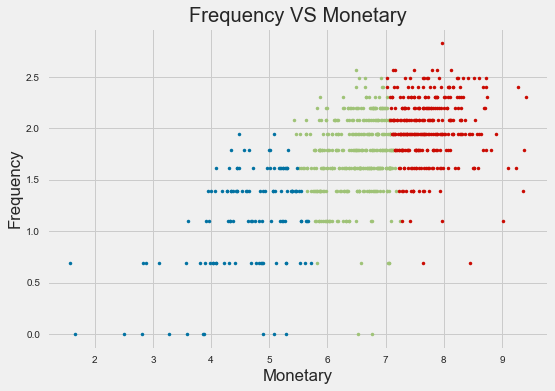

In [96]:
plt.plot(rfm_positive['Log_of_Monetary'][rfm_positive['K-Means_MF'] == 0], 
         rfm_positive['Log_of_Frequency'][rfm_positive['K-Means_MF'] == 0], 'g.')
plt.plot(rfm_positive['Log_of_Monetary'][rfm_positive['K-Means_MF'] == 1], 
         rfm_positive['Log_of_Frequency'][rfm_positive['K-Means_MF'] == 1], 'r.')
plt.plot(rfm_positive['Log_of_Monetary'][rfm_positive['K-Means_MF'] == 2], 
         rfm_positive['Log_of_Frequency'][rfm_positive['K-Means_MF'] == 2], 'b.')
plt.title("Frequency VS Monetary")
plt.xlabel('Monetary')
plt.ylabel('Frequency')

In [97]:
data.head()

,Order ID,Order Date,Years,Months,Days,Date,DayOfMonth,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016,11,2,2016-11-08,8,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-138688,2016-06-12,2016,6,7,2016-06-12,12,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015,10,7,2015-10-11,11,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,CA-2014-115812,2014-06-09,2014,6,1,2014-06-09,9,BH-11710,Brosina Hoffman,Consumer,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
12,CA-2017-114412,2017-04-15,2017,4,6,2017-04-15,15,AA-10480,Andrew Allen,Consumer,...,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432


### Clustering Evaluation and Cluster Exploration

In this projects, i am trying to do customer segmentation using RFM Analysis. In analyzing the RFM value i am using 2 methods which is Quantiles Method and K-Means Clustering. From those ways, i get 2 different clustering results. In Quantiles Method, I get 6 different group or clusters which is :

Best Customers:  30
Loyal Customers:  159
Big Spenders:  198
Almost Lost:  14
Lost Customers:  8
Lost Cheap Customers:  74


#### Insight :

    Recommendation for “Best Customers" segment: Focus on increasing customer purchases therefore it is necessary to form a cross/Up Selling Strategy.
    Recommendation for “Loyal Customers" segment: The business team must optimize the budget campaign and the time campaign for this customer segment in order to maintain their loyalty and increase their value.
    Recommendation for “Almost Lost" segment: This customer segment is very at risk for churn, so focus on activating customers and making repurchases by forming a Reactivation Strategy, Retention Strategy.
    Recommendation for “Lost Cheap Customers" segment: This customer segment has churned, so the focus of the campaign is to reactivate the customer by forming a Reactivation strategy.


## 1. How many customers for each group/cluster?

In [98]:
cluster_member = pd.DataFrame({"Group 1" : [len(rfm_positive[rfm_positive["K-Means_RM"]==1])],
              "Group 2" : len(rfm_positive[rfm_positive["K-Means_RM"]==0]),
              "Group 3" : len(rfm_positive[rfm_positive["K-Means_RM"]==2]),
              "Group 4" : len(rfm_positive[rfm_positive["K-Means_RM"]==3]),
              "Group 5" : len(rfm_positive[rfm_positive["K-Means_RM"]==4])}).T
cluster_member.columns = ['number_of_member']
cluster_member.sort_values('number_of_member')

,number_of_member
Group 2,80
Group 4,86
Group 5,155
Group 3,228
Group 1,240


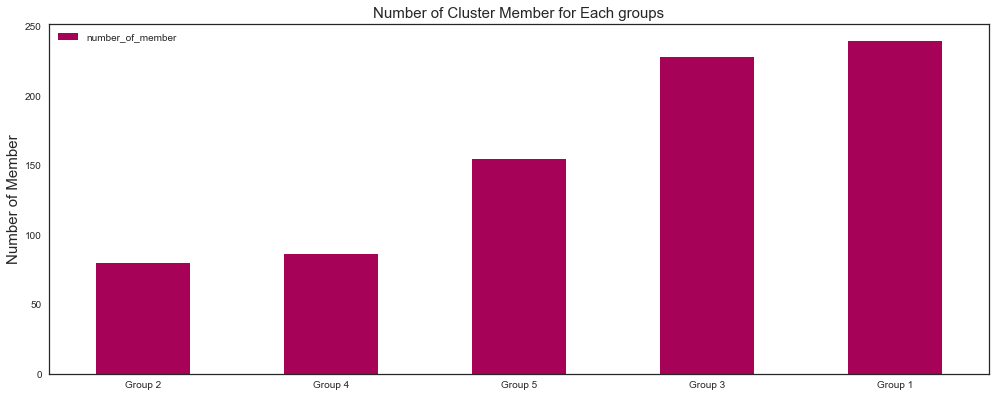

In [99]:
plt.style.use('seaborn-white')

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = cluster_member.sort_values('number_of_member')['number_of_member'].plot(kind='bar', color='m')
ax1.set_ylabel('Number of Member',fontsize=15)
ax1.set_title('Number of Cluster Member for Each groups',fontsize=15)
plt.xticks(rotation=(0))
plt.legend()

### 2. How does each cluster/group contribute to the company's sales?

In [100]:
rfm_positive.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,cluster,Log_of_Recency,Log_of_Frequency,Log_of_Monetary,K-Means_RF,K-Means_RM,K-Means_MF
Customer ID,,,,,,,,,,,,,,
AA-10315,184,5,5008.480,1,1,4,114,1,5.214936,1.609438,8.518888,2,2,1
AA-10375,19,9,718.000,4,4,2,442,0,2.944439,2.197225,6.576470,0,1,0
AA-10480,259,4,76.502,1,1,1,111,0,5.556828,1.386294,4.337317,1,3,2
AA-10645,55,6,1064.158,3,2,3,323,0,4.007333,1.791759,6.969939,0,1,0
AB-10015,415,3,283.316,1,1,1,111,0,6.028279,1.098612,5.646563,1,3,2


In [101]:
group_1 = rfm_positive[rfm_positive["K-Means_RM"]==1].index
group_2 = rfm_positive[rfm_positive["K-Means_RM"]==0].index
group_3 = rfm_positive[rfm_positive["K-Means_RM"]==2].index
group_4 = rfm_positive[rfm_positive["K-Means_RM"]==3].index
group_5 = rfm_positive[rfm_positive["K-Means_RM"]==4].index

In [102]:
list_cluster = []
for i in data['Customer ID']:
    if i in list(group_1) :
        list_cluster.append('Group 1')
    elif i in list(group_2) :
        list_cluster.append('Group 2')
    elif i in list(group_3) :
        list_cluster.append('Group 3')
    elif i in list(group_4) :
        list_cluster.append('Group 4')
    elif i in list(group_5):
         list_cluster.append('Group 5')
    else:
        list_cluster.append('Outlier')

In [103]:
data['K-Means_Cluster'] = list_cluster
data.head()

,Order ID,Order Date,Years,Months,Days,Date,DayOfMonth,Customer ID,Customer Name,Segment,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,K-Means_Cluster
0,CA-2016-152156,2016-11-08,2016,11,2,2016-11-08,8,CG-12520,Claire Gute,Consumer,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Group 3
2,CA-2016-138688,2016-06-12,2016,6,7,2016-06-12,12,DV-13045,Darrin Van Huff,Corporate,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Group 1
3,US-2015-108966,2015-10-11,2015,10,7,2015-10-11,11,SO-20335,Sean O'Donnell,Consumer,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Group 1
5,CA-2014-115812,2014-06-09,2014,6,1,2014-06-09,9,BH-11710,Brosina Hoffman,Consumer,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,Group 1
12,CA-2017-114412,2017-04-15,2017,4,6,2017-04-15,15,AA-10480,Andrew Allen,Consumer,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,Group 4


In [104]:
data.isna().sum()

Order ID           0
Order Date         0
Years              0
Months             0
Days               0
Date               0
DayOfMonth         0
Customer ID        0
Customer Name      0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
K-Means_Cluster    0
dtype: int64

In [105]:
ord_sales_cluster = pd.DataFrame({"Sales" : data.groupby('K-Means_Cluster')['Sales'].sum(),
                                "Order" :data.groupby('K-Means_Cluster')['Quantity'].sum()})
ord_sales_cluster.drop(['Outlier'], inplace=True)
ord_sales_cluster

,Sales,Order
K-Means_Cluster,,
Group 1,538582.6460,7195
Group 2,148804.6600,2216
Group 3,337472.5665,5587
Group 4,14896.0870,1016
Group 5,55339.7352,2934


In [107]:
# pie plot
import plotly.express as px

fig = px.pie(ord_sales_cluster['Sales'],
             values=ord_sales_cluster['Sales'].values,
             names=ord_sales_cluster['Sales'].index,
             title="Clusters Contribution by Sales",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
#Saving Plot for dashboards

fig.show()

In [108]:
 #Making new feature named 'Item Price'
data['Item Price'] = data['Sales'] / (data['Quantity'] * (1 - data['Discount']))
# Rounding to 2 decimal points
data['Item Price'] = data['Item Price'].round(2)
data.head()

,Order ID,Order Date,Years,Months,Days,Date,DayOfMonth,Customer ID,Customer Name,Segment,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,K-Means_Cluster,Item Price
0,CA-2016-152156,2016-11-08,2016,11,2,2016-11-08,8,CG-12520,Claire Gute,Consumer,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Group 3,130.98
2,CA-2016-138688,2016-06-12,2016,6,7,2016-06-12,12,DV-13045,Darrin Van Huff,Corporate,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Group 1,7.31
3,US-2015-108966,2015-10-11,2015,10,7,2015-10-11,11,SO-20335,Sean O'Donnell,Consumer,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Group 1,348.21
5,CA-2014-115812,2014-06-09,2014,6,1,2014-06-09,9,BH-11710,Brosina Hoffman,Consumer,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,Group 1,6.98
12,CA-2017-114412,2017-04-15,2017,4,6,2017-04-15,15,AA-10480,Andrew Allen,Consumer,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,Group 4,6.48


### 3. What is the common stock ordered in each group

In [109]:
top_5_1 = data[data['K-Means_Cluster']=='Group 1'].sort_values(by='Quantity', ascending=False).head()['Product Name']
top_5_2 = data[data['K-Means_Cluster']=='Group 2'].sort_values(by='Quantity', ascending=False).head()['Product Name']
top_5_3 = data[data['K-Means_Cluster']=='Group 3'].sort_values(by='Quantity', ascending=False).head()['Product Name']
top_5_4 = data[data['K-Means_Cluster']=='Group 4'].sort_values(by='Quantity', ascending=False).head()['Product Name']
top_5_5 = data[data['K-Means_Cluster']=='Group 5'].sort_values(by='Quantity', ascending=False).head()['Product Name']

top_price_1 = data[data['K-Means_Cluster']=='Group 1'].sort_values(by='Quantity', ascending=False).head(10)['Item Price']
top_price_2 = data[data['K-Means_Cluster']=='Group 2'].sort_values(by='Quantity', ascending=False).head(10)['Item Price']
top_price_3 = data[data['K-Means_Cluster']=='Group 3'].sort_values(by='Quantity', ascending=False).head(10)['Item Price']
top_price_4 = data[data['K-Means_Cluster']=='Group 4'].sort_values(by='Quantity', ascending=False).head(10)['Item Price']
top_price_5 = data[data['K-Means_Cluster']=='Group 5'].sort_values(by='Quantity', ascending=False).head(10)['Item Price']

In [110]:
temp_stock = pd.DataFrame()
temp_stock.insert(loc=0, value=top_5_1.values, column='Group 1')
temp_stock.insert(loc=1, value=top_5_2.values, column='Group 2')
temp_stock.insert(loc=2, value=top_5_3.values, column='Group 3')
temp_stock.insert(loc=3, value=top_5_4.values, column='Group 4')
temp_stock.insert(loc=4, value=top_5_5.values, column='Group 5')
temp_stock

,Group 1,Group 2,Group 3,Group 4,Group 5
0,DAX Wood Document Frame,Eldon ProFile File 'N Store Portable File Tub ...,"Metal Folding Chairs, Beige, 4/Carton",Avery Durable Slant Ring Binders With Label Ho...,Staples in misc. colors
1,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,"Safco Chair Connectors, 6/Carton",Personal Creations Ink Jet Cards and Labels,"GBC Standard Recycled Report Covers, Clear Pla...","OIC Colored Binder Clips, Assorted Sizes"
2,PureGear Roll-On Screen Protector,Samsung Galaxy Mega 6.3,Ultra Door Push Plate,Round Specialty Laser Printer Labels,Cardinal EasyOpen D-Ring Binders
3,"Global Stack Chair without Arms, Black","Maxell Pro 80 Minute CD-R, 10/Pack",Xerox 1964,"Redi-Strip #10 Envelopes, 4 1/8 x 9 1/2","Wilson Jones Elliptical Ring 3 1/2"" Capacity B..."
4,"Global Push Button Manager's Chair, Indigo",Xerox 1945,Kensington 4 Outlet MasterPiece Compact Power ...,Newell 327,Belkin F9H710-06 7 Outlet SurgeMaster Surge Pr...


In [111]:
price_cluster = pd.DataFrame()
price_cluster.insert(loc=0, value=top_price_1.values, column='Group 1')
price_cluster.insert(loc=1, value=top_price_2.values, column='Group 2')
price_cluster.insert(loc=2, value=top_price_3.values, column='Group 3')
price_cluster.insert(loc=3, value=top_price_4.values, column='Group 4')
price_cluster.insert(loc=4, value=top_price_5.values, column='Group 5')
price_cluster

,Group 1,Group 2,Group 3,Group 4,Group 5
0,13.73,19.31,33.94,4.18,4.84
1,15.97,38.48,11.48,10.78,3.58
2,19.99,419.99,4.91,12.53,9.14
3,25.98,17.48,22.84,2.95,42.80
4,60.89,40.99,81.32,2.21,18.84
5,7.78,5.94,124.49,2.46,20.77
6,95.99,109.95,70.98,3.29,17.52
7,550.98,2.20,6.69,7.78,34.95
8,42.10,160.98,36.32,4.92,8.39
9,760.98,69.00,3.25,289.53,34.28


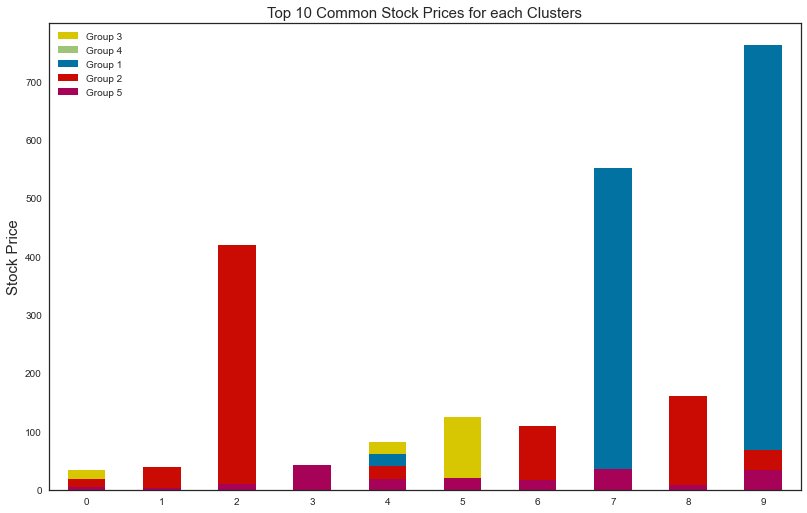

In [112]:
plt.style.use('seaborn-white')

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1 = price_cluster['Group 3'].plot(kind='bar', color='y')
ax2 = price_cluster['Group 4'].plot(kind='bar', color='g')
ax3 = price_cluster['Group 1'].plot(kind='bar', color='b')
ax4 = price_cluster['Group 2'].plot(kind='bar', color='r')
ax5 = price_cluster['Group 5'].plot(kind='bar', color='m')

ax1.set_ylabel('Stock Price',fontsize=15)
ax1.set_title('Top 10 Common Stock Prices for each Clusters',fontsize=15)

plt.xticks(rotation=(0))
plt.legend()

### 4. When does each cluster usually made an order?

In [113]:
data[data['K-Means_Cluster']=='Group 4']

,Order ID,Order Date,Years,Months,Days,Date,DayOfMonth,Customer ID,Customer Name,Segment,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,K-Means_Cluster,Item Price
12,CA-2017-114412,2017-04-15,2017,4,6,2017-04-15,15,AA-10480,Andrew Allen,Consumer,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,Group 4,6.48
17,CA-2014-167164,2014-05-13,2014,5,2,2014-05-13,13,AG-10270,Alejandro Grove,Consumer,...,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.500,2,0.0,9.9900,Group 4,27.75
70,CA-2016-106075,2016-09-18,2016,9,7,2016-09-18,18,HM-14980,Henry MacAllister,Consumer,...,OFF-BI-10004654,Office Supplies,Binders,Avery Binding System Hidden Tab Executive Styl...,4.616,1,0.2,1.7310,Group 4,5.77
98,CA-2016-149223,2016-09-06,2016,9,2,2016-09-06,6,ER-13855,Elpida Rittenbach,Corporate,...,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.880,6,0.0,22.5852,Group 4,12.98
171,CA-2014-118962,2014-08-05,2014,8,2,2014-08-05,5,CS-12130,Chad Sievert,Consumer,...,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",20.940,3,0.0,9.8418,Group 4,6.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,CA-2017-166499,2017-03-19,2017,3,7,2017-03-19,19,VG-21805,Vivek Grady,Corporate,...,OFF-AR-10002467,Office Supplies,Art,Dixon Ticonderoga Pencils,8.940,3,0.0,2.4138,Group 4,2.98
9923,CA-2015-159534,2015-03-20,2015,3,5,2015-03-20,20,DH-13075,Dave Hallsten,Corporate,...,OFF-BI-10003982,Office Supplies,Binders,Wilson Jones Century Plastic Molded Ring Binders,49.848,3,0.2,16.8237,Group 4,20.77
9928,CA-2016-129630,2016-09-04,2016,9,7,2016-09-04,4,IM-15055,Ionia McGrath,Consumer,...,FUR-FU-10000260,Furniture,Furnishings,"6"" Cubicle Wall Clock, Black",24.270,3,0.0,8.7372,Group 4,8.09
9934,CA-2016-114405,2016-04-07,2016,4,4,2016-04-07,7,AS-10240,Alan Shonely,Consumer,...,OFF-AP-10003278,Office Supplies,Appliances,Belkin 7-Outlet SurgeMaster Home Series,33.528,3,0.2,2.5146,Group 4,13.97


In [114]:
date_group1 = pd.DataFrame(data[data['K-Means_Cluster']=='Group 1'].groupby('DayOfMonth').sum()['Quantity'])
date_group2 = pd.DataFrame(data[data['K-Means_Cluster']=='Group 2'].groupby('DayOfMonth').sum()['Quantity'])
date_group3 = pd.DataFrame(data[data['K-Means_Cluster']=='Group 3'].groupby('DayOfMonth').sum()['Quantity'])
date_group4 = pd.DataFrame(data[data['K-Means_Cluster']=='Group 4'].groupby('DayOfMonth').sum()['Quantity'])

date_group1.insert(loc=1, value=date_group2['Quantity'], column='Group 2')
date_group1.insert(loc=2, value=date_group3['Quantity'], column='Group 3')
date_group1.insert(loc=3, value=date_group4['Quantity'], column='Group 4')
date_group1

,Quantity,Group 2,Group 3,Group 4
DayOfMonth,,,,
1,235,80,166,21
2,228,47,222,21
3,235,107,193,58
4,176,69,158,40
5,236,92,182,66
6,217,39,146,38
7,284,69,155,46
8,280,68,222,31
9,299,66,179,8


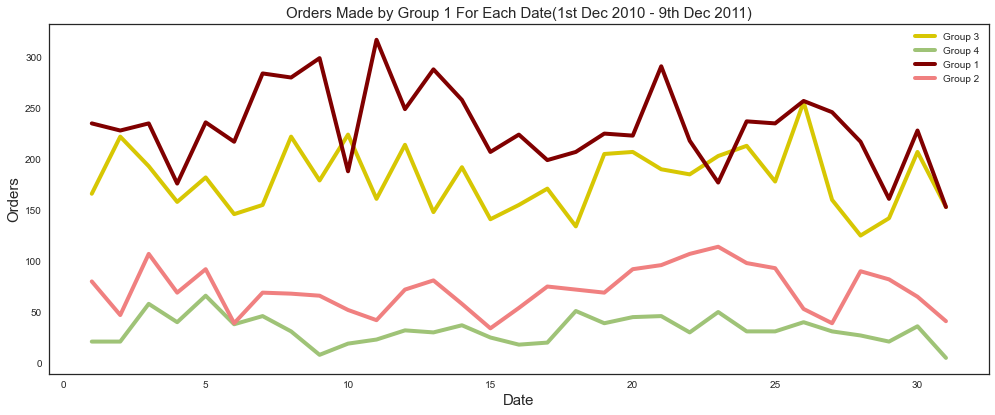

In [115]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = date_group1['Group 3'].plot(kind='line', color='y', label='Group 3')
ax2 = date_group1['Group 4'].plot(kind='line', color='g', label='Group 4')
ax3 = date_group1['Quantity'].plot(kind='line', color='maroon', label='Group 1')
ax4 = date_group1['Group 2'].plot(kind='line', color='lightcoral', label='Group 2')

ax1.set_xlabel('Date',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax1.set_title('Orders Made by Group 1 For Each Date(1st Dec 2010 - 9th Dec 2011)',fontsize=15)
plt.legend()

In [116]:
data[data['Discount']>0]

,Order ID,Order Date,Years,Months,Days,Date,DayOfMonth,Customer ID,Customer Name,Segment,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,K-Means_Cluster,Item Price
3,US-2015-108966,2015-10-11,2015,10,7,2015-10-11,11,SO-20335,Sean O'Donnell,Consumer,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Group 1,348.21
12,CA-2017-114412,2017-04-15,2017,4,6,2017-04-15,15,AA-10480,Andrew Allen,Consumer,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,Group 4,6.48
13,CA-2016-161389,2016-12-05,2016,12,1,2016-12-05,5,IM-15070,Irene Maddox,Consumer,...,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.9760,3,0.20,132.5922,Group 3,169.99
14,US-2015-118983,2015-11-22,2015,11,7,2015-11-22,22,HP-14815,Harold Pawlan,Home Office,...,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,Group 1,68.81
23,US-2017-156909,2017-07-16,2017,7,7,2017-07-16,16,SF-20065,Sandra Flanagan,Consumer,...,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,Group 5,50.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,CA-2015-143700,2015-07-26,2015,7,7,2015-07-26,26,AS-10240,Alan Shonely,Consumer,...,OFF-PA-10003072,Office Supplies,Paper,"Eureka Recycled Copy Paper 8 1/2"" x 11"", Ream",10.3680,2,0.20,3.6288,Group 4,6.48
9972,CA-2016-130225,2016-09-11,2016,9,7,2016-09-11,11,RC-19960,Ryan Crowe,Consumer,...,OFF-EN-10000056,Office Supplies,Envelopes,Cameo Buff Policy Envelopes,99.5680,2,0.20,33.6042,Group 5,62.23
9973,US-2016-103674,2016-12-06,2016,12,2,2016-12-06,6,AP-10720,Anne Pryor,Home Office,...,TEC-PH-10004080,Technology,Phones,Avaya 5410 Digital phone,271.9600,5,0.20,27.1960,Group 5,67.99
9981,CA-2017-163566,2017-08-03,2017,8,4,2017-08-03,3,TB-21055,Ted Butterfield,Consumer,...,OFF-LA-10004484,Office Supplies,Labels,Avery 476,16.5200,5,0.20,5.3690,Group 5,4.13


### 5. How does each cluster react on a discounts?

In [117]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 
          'july', 'august', 'september', 'october', 'november', 'desember']

disc_count = []
mon_ord = []
mon_ord_1 = []
mon_ord_2 = []
mon_ord_3 = []
mon_ord_4 = []
mon_ord_5 = []

for i in range(1,13):
    mon_ord.append(data[data['Months'] == i]['Quantity'].sum())
    mon_ord_1.append(data[(data['Months'] == i)&(data['K-Means_Cluster']=='Group 1')]['Quantity'].sum())
    mon_ord_2.append(data[(data['Months'] == i)&(data['K-Means_Cluster']=='Group 2')]['Quantity'].sum())
    mon_ord_3.append(data[(data['Months'] == i)&(data['K-Means_Cluster']=='Group 3')]['Quantity'].sum())
    mon_ord_4.append(data[(data['Months'] == i)&(data['K-Means_Cluster']=='Group 4')]['Quantity'].sum())
    mon_ord_5.append(data[(data['Months'] == i)&(data['K-Means_Cluster']=='Group 5')]['Quantity'].sum())
    disc_count.append(data[(data['Discount']>0) &(data['Months'] == i)]['Discount'].count())
    
disc_ord = pd.DataFrame({'num_of_disc': disc_count, "Group 1": mon_ord_1, "Group 2": mon_ord_2,
                         "Group 3": mon_ord_3, "Group 4": mon_ord_4, "Group 5": mon_ord_5}, index=months)
disc_ord

,num_of_disc,Group 1,Group 2,Group 3,Group 4,Group 5
january,84,245,71,242,65,69
february,69,233,26,210,31,86
march,182,428,139,437,98,173
april,183,456,152,422,74,155
may,190,484,131,530,81,200
june,199,486,109,508,87,212
july,186,431,114,406,48,208
august,186,482,186,388,77,178
september,344,887,262,775,167,443
october,228,729,150,402,47,259


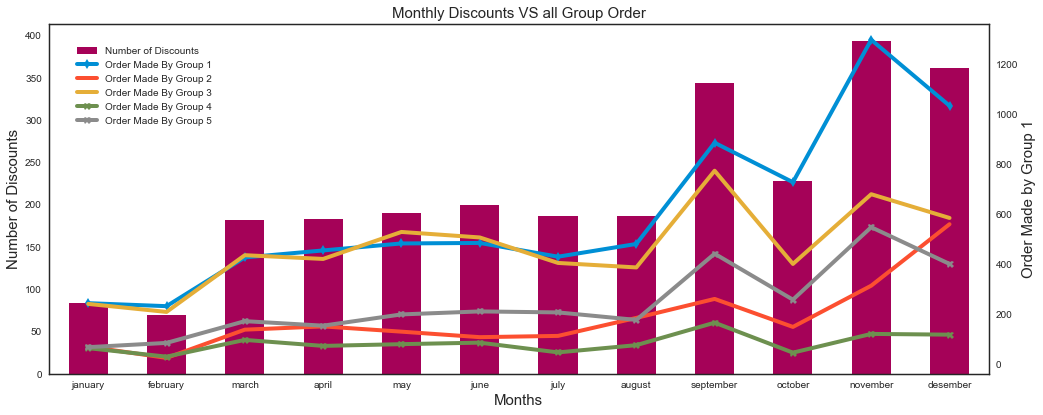

In [118]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_ord['num_of_disc'].plot(kind='bar', color='m', label='Number of Discounts')
ax2 = disc_ord['Group 1'].plot(kind='line', marker='d', secondary_y=True, label = 'Order Made By Group 1')
ax3 = disc_ord['Group 2'].plot(kind='line', marker='+', secondary_y=True, label = 'Order Made By Group 2')
ax4 = disc_ord['Group 3'].plot(kind='line', marker='x', secondary_y=True, label = 'Order Made By Group 3')
ax5 = disc_ord['Group 4'].plot(kind='line', marker='X', secondary_y=True, label = 'Order Made By Group 4')
ax6 = disc_ord['Group 5'].plot(kind='line', marker='X', secondary_y=True, label = 'Order Made By Group 5')

ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('Order Made by Group 1',fontsize=15)
ax1.set_title('Monthly Discounts VS all Group Order',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)

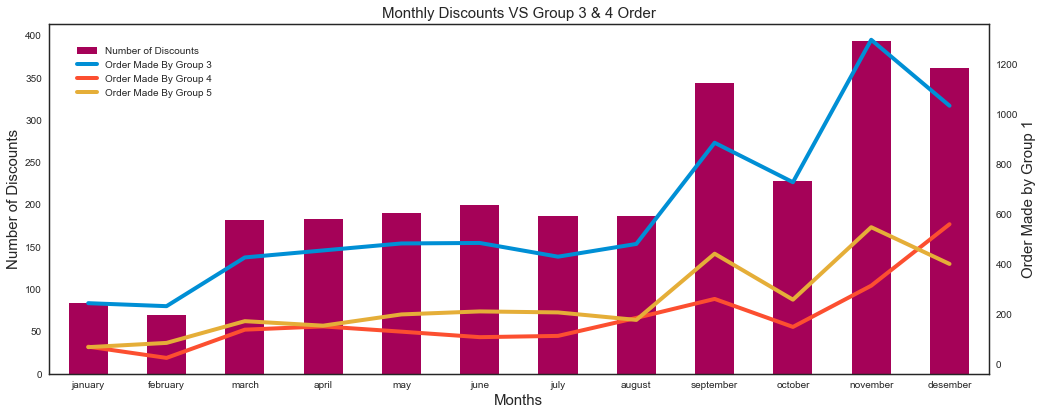

In [119]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_ord['num_of_disc'].plot(kind='bar', color='m', label='Number of Discounts')
ax2 = disc_ord['Group 1'].plot(kind='line', marker='+', secondary_y=True, label = 'Order Made By Group 3')
ax3 = disc_ord['Group 2'].plot(kind='line', marker='x', secondary_y=True, label = 'Order Made By Group 4')
ax4 = disc_ord['Group 5'].plot(kind='line', marker='x', secondary_y=True, label = 'Order Made By Group 5')

ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('Order Made by Group 1',fontsize=15)
ax1.set_title('Monthly Discounts VS Group 3 & 4 Order',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)

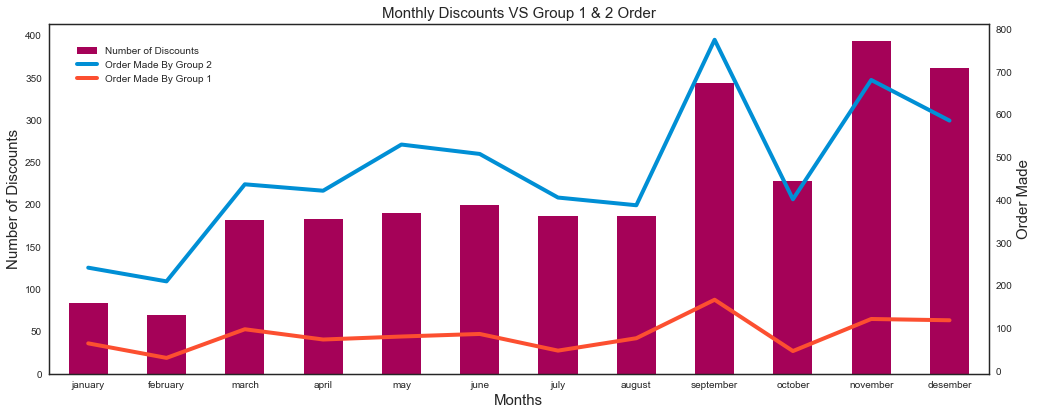

In [120]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_ord['num_of_disc'].plot(kind='bar', color='m', label='Number of Discounts')
ax2 = disc_ord['Group 3'].plot(kind='line', marker='+', secondary_y=True, label = 'Order Made By Group 2')
ax3 = disc_ord['Group 4'].plot(kind='line', marker='x', secondary_y=True, label = 'Order Made By Group 1')



ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('Order Made',fontsize=15)
ax1.set_title('Monthly Discounts VS Group 1 & 2 Order',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)

### 5. How does each cluster react on a discounts?

In [121]:
disc_corr = disc_ord.corr()
disc_corr = pd.DataFrame(disc_corr.drop('num_of_disc')['num_of_disc'])
disc_corr.sort_values(by='num_of_disc', ascending=False)

,num_of_disc
Group 5,0.976288
Group 1,0.969024
Group 3,0.908553
Group 2,0.841131
Group 4,0.792659


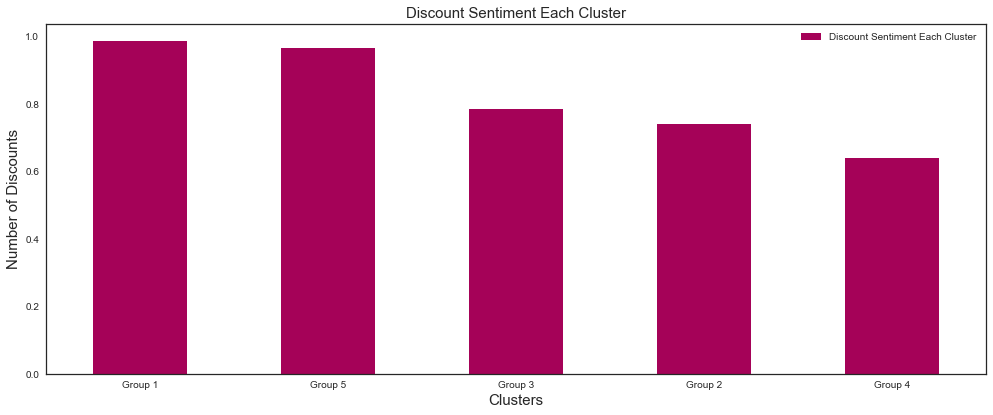

In [122]:
disc_corr = pd.DataFrame(disc_ord.corr('spearman')['num_of_disc'].sort_values(ascending=False))
disc_corr.drop(['num_of_disc'], inplace=True)

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_corr['num_of_disc'].plot(kind='bar', color='m', label='Discount Sentiment Each Cluster')
ax1.set_xlabel('Clusters',fontsize=15)
ax1.set_ylabel('Number of Discounts',fontsize=15)
ax2.set_ylabel('Order Made by Group 1',fontsize=15)
ax1.set_title('Discount Sentiment Each Cluster',fontsize=15)
plt.xticks(rotation=(0))
plt.legend()